# ASSIGNMENT
Anda adalah seorang Data Scientist di sebuah perusahaan konsultan pendidikan. Perusahaan ingin menganalisis apakah tingkat pendidikan memiliki pengaruh terhadap pendapatan seseorang. Anda diminta untuk melakukan analisis menggunakan data yang tersedia dengan melakukan pengujian hipotesis statistik. Dataset berisi informasi tentang:

Education. <br>
Income.

# Soal 1 Perumusan Hipotesis

Berdasarkan business request di atas maka dapat dirumuskan hipotesis pengujian sebagai berikut: <br>

1. H0: Tidak terdapat pengaruh antara tingkat pendidikan terhadap pendapatan
2. H1: Terdapat pengaruh antara tingkat pendidikan terhadap pendapatan

# Soal 2 Metode Pengujian

Setelah didapatkan hipotesis di atas maka metode pengujian akan ditentukan berdasarkan hipotesis dan karakteristik data. <br>
Data yang akan diuji memiliki karakteristik sebagai berikut:<br>

*  Education yang terdiri dari Graduation, PhD, Master, Basic, dan 2n Cycle sebagai variabel independen
*   Income sebagai variabel dependen atau variabel yang dipengaruhi

Maka dari itu pengujian hipotesis dapat menggunakan **Uji Anova One Way** untuk membandingkan rata - rata tiga atau lebih kelompok yang berasal dari satu faktor independen

# Soal 3 Analisis dan Interpretasi
Sebelum melakukan Uji ANOVA One Way diperlukan beberapa uji untuk memenuhi asumsi dan syarat Uji ANOVA yaitu:<br>

*   Data Berdistribusi Normal
*   Variance Homogen atau Sama





## Import library dan dataset yang akan digunakan

In [ ]:
#Import library dan dataset yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
pd.set_option("display.max_columns",None)

df = pd.read_csv("/content/marketing_campaign(Assignment Hipotesis Testing).csv",sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
print(df["Income"].min(), df["Income"].max())

1730.0 666666.0


In [ ]:
#Identifikasi missing data
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
#Menghapus data NULL
df = df.dropna()

In [ ]:
#Cek NULL pada data
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## Uji Normalitas Menggunakan Histogram

<Axes: xlabel='Income', ylabel='Count'>

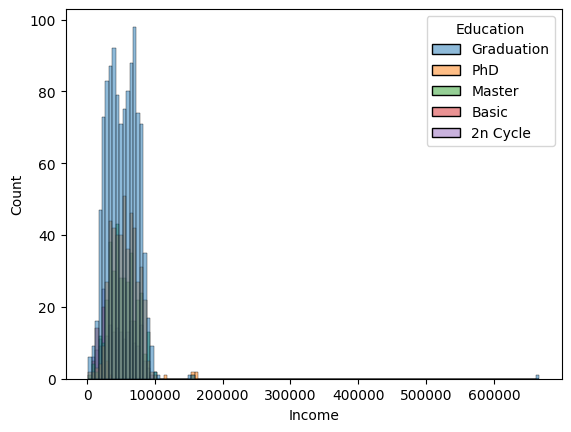

In [ ]:
#Uji Normalitas
sns.histplot(
    data = df,
    x = "Income",
    hue = "Education"
)

Berdasarkan histogram di atas dapat diasumsikan bahwa data berdistribusi normal

## Uji Variance
* H0: Variance antar kelompok sama / homogen
* H1: Variance antar kelompok berbeda

In [ ]:
#Uji Levene (Variance)
graduation = df[df["Education"] == "Graduation"]["Income"]
phd = df[df["Education"] == "PhD"]["Income"]
master = df[df["Education"] == "Master"]["Income"]
basic = df[df["Education"] == "Basic"]["Income"]
cycle2N = df[df["Education"] == "2n Cycle"]["Income"]

alpha = 0.05

statistic, pvalue = stats.levene(graduation, phd, master, basic, cycle2N)

print("P-value:",pvalue,"alpha:", alpha)

if float(pvalue) < float(alpha):
    print("H1 diterima, maka variance antar kelompok berbeda")
else:
    print("H0 diterima, maka variance antar kelompok sama/homogen")

P-value: 1.043393432818024e-07 alpha: 0.05
H1 diterima, maka variance antar kelompok berbeda


## Uji ANOVA
Setelah melakukan uji normalitas dan uji variance terhadap data dan ditemukan bahwa data berdistribusi normal dan variance antar kelompok tidak homogen / tidak sama, (karena diasumsikan variancenya homogen) maka dapat dilakukan Uji ANOVA ONE WAY

In [ ]:
#Uji ANOVA
from scipy.stats import f_oneway
f_test, pvalue = f_oneway(graduation, phd, master, basic, cycle2N)

p_value = pvalue
print("P-value:",p_value,"alpha:", alpha)

if p_value < alpha:
    print ("H1 diterima, Maka terdapat pengaruh antara pendidikan terhadap pendapatan")
else:
    print ("H0 diterima, Maka tidak terdapat pengaruh antara pendidikan terhadap pendapatan")

P-value: 1.6677281316366318e-22 alpha: 0.05
H1 diterima, Maka terdapat pengaruh antara pendidikan terhadap pendapatan


## Kesimpulan

**Berdasarkan uji hipotesis di atas ditemukan bahwa H1 diterima, maka dapat disimpulkan bahwa terdapat pengaruh antara tingkat pendidikan terhadap pendapatan seseorang.**